## Before the Challenge: Understanding Geospatial Data Operations
Imagine you have various geometric shapes, for instance, that of a car drawing you created in the previous exercise, and you need to create a geospatial dataset in GeoPandas, perform operations like buffering, and visualize the data using maps. This exercise helps in understanding the basics of geospatial data handling and visualization, which is widely used in geospatial data science and analytics.  


## Challenge: Creating and Visualizing Geospatial Data
In this challenge, you'll explore the world of geospatial data to create a simple dataset, perform basic geometric operations, and visualize the results. Namely, you will work with manually created geometries, perform operations such as buffering, compute lengths and areas, and visualize the data using Matplotlib.  

To get started: Open your Python environment and follow the instructions below.  

### Understanding and preprocessing the data:

- You'll start by importing the necessary libraries and setting up the geometries; for that, we advise to use the car part geometries of the previous section
- Combine the geometries into a single Python list

### Creating the geospatial dataframe:

- Create a geospatial dataframe from manually created geometries using GeoPandas' GeoDataFrame constructor
- Display the created GeoDataframe
- Make sure the initial CRS is set to EPSG:4326  

### Performing geometric operations:

- Run simple functions on the geodataframe by computing the length and area of each geometry
- Update (rewrite) the geometry column with the buffered version of each geometry; use a small buffering radius of 0.2 to ensure geometries will have smooth corners

### Visualizing the data:

- Visualize the data using several Matplotlib commands
- Color each record of the GeoDataFrame based on its "geometry_length" value, use a colormap, such as "Reds," set an alpha value for transparency, and customize the line width and color features

### Applying map projections:

- Create two new variations of the original GeoDataFrame, projected into the New York City local (EPSG:2263) and Hungary local (EPSG:23700) CRS
- Visualize both reprojected GeoDataFrames

### What you'll learn: 
By the end of this challenge, you'll have gained valuable skills in creating geospatial dataframes, applying functions on them, visualizing geospatial data, and applying map projections. This is a hands-on opportunity to apply geospatial techniques in a practical and engaging way.

In [1]:
# Importing necessary libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
# Create geometries
top = Polygon([(0, 1), (0, 2), (2, 2), (2, 1)])
bottom = Polygon([(-1, 0), (-1, 1), (4, 1), (4, 0)])
wheel_front = Point(0, -0.5).buffer(0.5)
wheel_rear = Point(3, -0.5).buffer(0.5)

In [3]:
# Combine geometries into a list
geometries = [top, bottom, wheel_front, wheel_rear]
geometries

[<POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))>,
 <POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))>,
 <POLYGON ((0.5 -0.5, 0.498 -0.549, 0.49 -0.598, 0.478 -0.645, 0.462 -0.691, ...>,
 <POLYGON ((3.5 -0.5, 3.498 -0.549, 3.49 -0.598, 3.478 -0.645, 3.462 -0.691, ...>]

In [4]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=geometries)
gdf.crs = 4326
display(gdf)

,geometry
0,"POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))"
1,"POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))"
2,"POLYGON ((0.5 -0.5, 0.49759 -0.54901, 0.49039 ..."
3,"POLYGON ((3.5 -0.5, 3.49759 -0.54901, 3.49039 ..."


In [5]:
# Add a new column for geometry length
gdf['geometry_length'] = gdf.length

# Add a new column for geometry area
gdf['geometry_area'] = gdf.area

gdf.head()

C:\Users\quay\AppData\Local\Temp\ipykernel_10220\3120514763.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry_length'] = gdf.length
C:\Users\quay\AppData\Local\Temp\ipykernel_10220\3120514763.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry_area'] = gdf.area


,geometry,geometry_length,geometry_area
0,"POLYGON ((0 1, 0 2, 2 2, 2 1, 0 1))",6.000000,2.000000
1,"POLYGON ((-1 0, -1 1, 4 1, 4 0, -1 0))",12.000000,5.000000
2,"POLYGON ((0.5 -0.5, 0.49759 -0.54901, 0.49039 ...",3.140331,0.784137
3,"POLYGON ((3.5 -0.5, 3.49759 -0.54901, 3.49039 ...",3.140331,0.784137


In [6]:
# Buffer
gdf['geometry'] = [g.buffer(0.2) for g in gdf.geometry.to_list()]
gdf.head()

,geometry,geometry_length,geometry_area
0,"POLYGON ((0 0.8, -0.0196 0.80096, -0.03902 0.8...",6.000000,2.000000
1,"POLYGON ((-1 -0.2, -1.0196 -0.19904, -1.03902 ...",12.000000,5.000000
2,"POLYGON ((0.69976 -0.49019, 0.69976 -0.50981, ...",3.140331,0.784137
3,"POLYGON ((3.69976 -0.49019, 3.69976 -0.50981, ...",3.140331,0.784137


<Axes: >

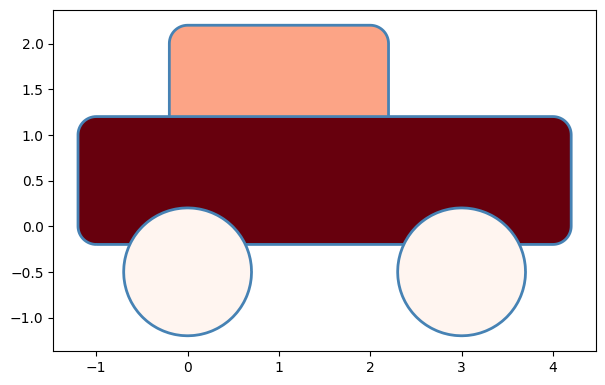

In [41]:
# Visualize the GeoDataFrame
f, ax = plt.subplots(1, 1, figsize=(7, 7))

gdf.plot(ax=ax, column = 'geometry_length', edgecolor='steelblue', cmap = 'Reds', linewidth = 2)

In [36]:
ny = gdf.to_crs(2263)

<Axes: >

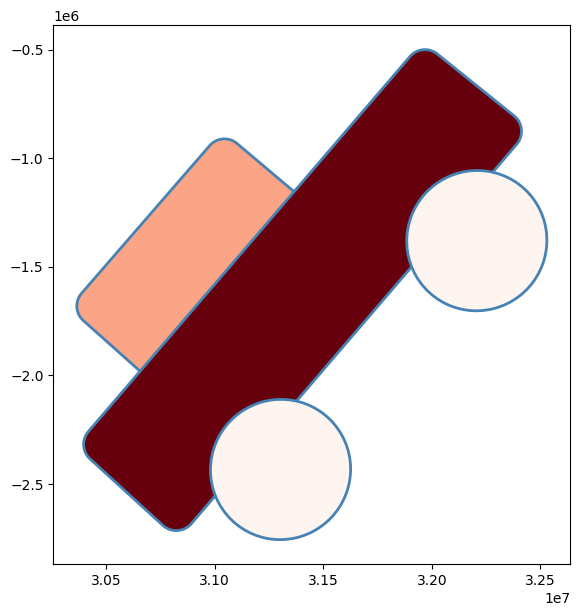

In [42]:
# Visualize the GeoDataFrame
f, ax = plt.subplots(1, 1, figsize=(7, 7))

ny.plot(ax=ax, column = 'geometry_length', edgecolor='steelblue', cmap = 'Reds', linewidth = 2)

In [38]:
hun = gdf.to_crs(23700)

<Axes: >

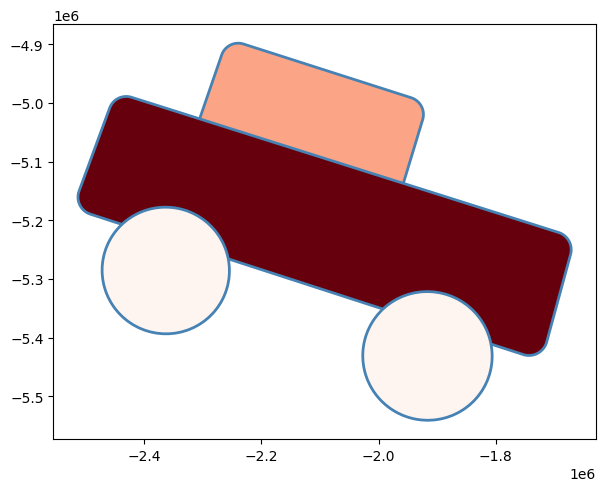

In [40]:
# Visualize the GeoDataFrame
f, ax = plt.subplots(1, 1, figsize=(7, 7))

hun.plot(ax=ax, column = 'geometry_length', cmap = 'Reds', edgecolor='steelblue', linewidth = 2)